In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textblob as tb
%matplotlib inline

In [2]:
np.random.seed(100)

In [3]:
labels = pd.read_csv('hygiene.dat.labels', names=['indicator'])
labels.head()

,indicator
0,1
1,1
2,1
3,0
4,0


In [4]:
test_labels = labels[labels.indicator == '[None]']
len(test_labels)

12753

In [5]:
len(labels)

13299

In [6]:
train_labels = labels[labels.indicator != '[None]']

In [7]:
len(train_labels)

546

## text cleaning

In [8]:
reviews_file = open('hygiene.dat')
reviews = reviews_file.readlines()
reviews[1]
#Each line contains the concatenated text reviews of one restaurant.#

'I live up the street from Betty. &#160;When my sister was in town for Spring Break, we made an effort to hit several little places we had never been to before.BETTY WAS PRETTY SWEET!The service was lively. &#160;We made a reservation (via Yelp of course) and were seated right away by the window for a group of four. &#160;I love sitting by the window because I want to be seen when I\'m out. &#160;It was really a pleasant evening.Three of us had the Betty Burger, which was substantially larger than I expected. &#160;My sister had the pan roasted chicken, which was also generously portioned.For those of you who would be traveling to Queen Anne from elsewhere, FREE PARKING ON QUEEN ANNE AVE, WHOOOHOOO! :) Wow.. Came here for Happy Hour and never knew this place had a back room. I highly recommend coming here for Happy Hour. The place is classy with just enough dark ambiance to make this place sexy. The food was great! We went small place style and got the following items. Happy Hour Clams

In [9]:
reviews_table = pd.DataFrame(reviews, columns = ['reviews'])
reviews_table.head()

,reviews
0,"The baguettes and rolls are excellent, and alt..."
1,I live up the street from Betty. &#160;When my...
2,I'm worried about how I will review this place...
3,Why can't you access them on Google street vie...
4,Things to like about this place: homemade guac...


In [10]:
#clean the reviews
reviews_table['reviews'] = reviews_table['reviews'].str.lower().str.replace("&#160;","")\
.str.replace('\n','').str.replace('[^\w\s]','').str.replace(' +', ' ').str.replace('"','')


In [11]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 


In [12]:
reviews_table['reviews'] = reviews_table['reviews'].apply(remove_punctuation)

In [13]:
reviews_table['reviews'][1]

'i live up the street from betty when my sister was in town for spring break we made an effort to hit several little places we had never been to beforebetty was pretty sweetthe service was lively we made a reservation via yelp of course and were seated right away by the window for a group of four i love sitting by the window because i want to be seen when im out it was really a pleasant eveningthree of us had the betty burger which was substantially larger than i expected my sister had the pan roasted chicken which was also generously portionedfor those of you who would be traveling to queen anne from elsewhere free parking on queen anne ave whooohooo wow came here for happy hour and never knew this place had a back room i highly recommend coming here for happy hour the place is classy with just enough dark ambiance to make this place sexy the food was great we went small place style and got the following items happy hour clams were amazing the broth was interesting with just enough ki

In [14]:
len(reviews_table['reviews'])

13299

## compute total character lengths and total number of words

In [15]:
reviews_table['total_char_length'] = reviews_table['reviews'].str.len()
reviews_table.head()

,reviews,total_char_length
0,the baguettes and rolls are excellent and alth...,3694
1,i live up the street from betty when my sister...,11662
2,im worried about how i will review this place ...,10122
3,why cant you access them on google street view...,28499
4,things to like about this place homemade guaca...,4636


In [16]:
reviews_table['total_num_words'] = reviews_table['reviews'].apply(lambda x: len(x.split()))
reviews_table.head()

,reviews,total_char_length,total_num_words
0,the baguettes and rolls are excellent and alth...,3694,690
1,i live up the street from betty when my sister...,11662,2177
2,im worried about how i will review this place ...,10122,1935
3,why cant you access them on google street view...,28499,5264
4,things to like about this place homemade guaca...,4636,888


In [17]:
review_0=tb.TextBlob(reviews_table['reviews'][0])
review_0

TextBlob("the baguettes and rolls are excellent and although i havent tried them yet im excited about the dozenplus types of filled croissants on offer at ridiculously low prices cheese with or without ham blueberry with or without cream cheese chocolate almond this could be dangerous i have a bad bakery habit but at least at q bakery i wont go broke while i get fat ive tried four different banh mi and ill agree with matthew that the basic ones are somewhat americanized mushroom was more interesting than chicken or bbq pork obviously that made this a good place to get food for the inlaws that seemed exotic but not too scary note to self dont publish this on facebook where the inlaws might see it q bakerys location on two divided streets makes it a slight pain to get to but its worth a stop if you want affordable variety this used to be the location of my favorite bahn mi shop in seattle king baguettes so when i saw that after one year as a pho restaurant that a new bahn mi joint had ta

In [18]:
review_0.sentiment

Sentiment(polarity=0.16062523973916376, subjectivity=0.5786555919467311)

## compute term-document matrix 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# this is a function that calculates a term frequency matrix from the reviews
def term_doc_matrix(reviews, ngram_range):
    reviews = reviews.fillna(" ")
    vectorizer = CountVectorizer(ngram_range = ngram_range, stop_words = 'english', min_df = 20, max_df = 1.0)
    term_doc_column = pd.DataFrame(vectorizer.fit_transform(reviews).toarray(),
                                  columns = vectorizer.get_feature_names(),
                                  index = reviews.index)
    ordered_columns_by_count = term_doc_column.sum().reset_index().sort_values(0, ascending = False)['index']
    term_doc_column = term_doc_column[ordered_columns_by_count]
    return term_doc_column  

In [21]:
reviews_table.head()

,reviews,total_char_length,total_num_words
0,the baguettes and rolls are excellent and alth...,3694,690
1,i live up the street from betty when my sister...,11662,2177
2,im worried about how i will review this place ...,10122,1935
3,why cant you access them on google street view...,28499,5264
4,things to like about this place homemade guaca...,4636,888


In [22]:
%time review_vocabulary = term_doc_matrix(reviews_table['reviews'], (1,2))
review_vocabulary.head()

CPU times: user 1min 27s, sys: 23.5 s, total: 1min 50s
Wall time: 2min


,good,food,place,like,great,just,really,service,time,dont,...,tried lots,park blocks,tried famous,fanatics,despair,reactions,fan usually,star worthy,parking challenging,different staff
0,1,2,4,4,4,1,0,1,0,4,...,0,0,0,0,0,0,0,0,0,0
1,11,14,13,9,12,6,8,8,7,5,...,0,0,0,0,0,0,0,0,0,0
2,11,22,9,6,9,9,10,9,5,7,...,0,0,0,0,0,0,0,0,0,0
3,37,40,26,19,19,16,18,20,19,9,...,0,0,0,0,0,0,0,0,0,0
4,8,11,8,2,6,4,2,8,1,2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
reviews_table=reviews_table.rename(columns = {'reviews': 'review_text'})

In [24]:
reviews_table = reviews_table.join(review_vocabulary)
reviews_table.head()

,review_text,total_char_length,total_num_words,good,food,place,like,great,just,really,...,tried lots,park blocks,tried famous,fanatics,despair,reactions,fan usually,star worthy,parking challenging,different staff
0,the baguettes and rolls are excellent and alth...,3694,690,1,2,4,4,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,i live up the street from betty when my sister...,11662,2177,11,14,13,9,12,6,8,...,0,0,0,0,0,0,0,0,0,0
2,im worried about how i will review this place ...,10122,1935,11,22,9,6,9,9,10,...,0,0,0,0,0,0,0,0,0,0
3,why cant you access them on google street view...,28499,5264,37,40,26,19,19,16,18,...,0,0,0,0,0,0,0,0,0,0
4,things to like about this place homemade guaca...,4636,888,8,11,8,2,6,4,2,...,0,0,0,0,0,0,0,0,0,0


## compute part of speech tags for each review

In [25]:
#review_0.tags

In [26]:
#df_temp = pd.DataFrame()

In [27]:
#test_0 = pd.DataFrame(review_0.tags, columns = [0, 'pos'])

In [28]:
#test_0.head()

In [29]:
#df_temp = df_temp.append(test_0.groupby('pos').count().T)
#df_temp

In [30]:
#review_pos_freq = pos_freq(reviews_table['reviews'])

In [31]:
#review_pos_freq.head()

In [32]:
#reviews_table = reviews_table.join(review_pos_freq)

In [33]:
def pos_freq(reviews):
    pos_reviews = []
    index_reviews = []
    for index, text in reviews.iteritems():
        text_blob = tb.TextBlob(text)
        pos_reviews.append(text_blob.tags)
        index_reviews.append(index)
        
    pos_column = pd.DataFrame()
    for i in range(0, len(pos_reviews)):
        pos_tag_review = pd.DataFrame(pos_reviews[i], columns = [i, 'pos_tag'])
        pos_column = pos_column.append(pos_tag_review.groupby('pos_tag').count().T)
    pos_column = pos_column.reset_index(drop=True).fillna(0)
    return pos_column

In [34]:
reviews_table['review_text'].head()

0    the baguettes and rolls are excellent and alth...
1    i live up the street from betty when my sister...
2    im worried about how i will review this place ...
3    why cant you access them on google street view...
4    things to like about this place homemade guaca...
Name: review_text, dtype: object

In [35]:
review_pos_freq = pos_freq(reviews_table['review_text'])

In [36]:
review_pos_freq.head()

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,MD,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,30.0,8.0,64.0,3.0,0.0,81.0,89.0,4.0,1.0,3.0,...,20.0,23.0,11.0,13.0,32.0,19.0,2.0,0.0,0.0,4.0
1,97.0,18.0,232.0,2.0,0.0,233.0,245.0,2.0,4.0,19.0,...,63.0,137.0,34.0,49.0,61.0,58.0,11.0,7.0,0.0,14.0
2,104.0,20.0,197.0,2.0,2.0,182.0,203.0,10.0,6.0,30.0,...,80.0,113.0,24.0,36.0,62.0,43.0,9.0,6.0,0.0,14.0
3,245.0,56.0,538.0,11.0,6.0,528.0,582.0,17.0,30.0,54.0,...,187.0,343.0,68.0,109.0,148.0,109.0,30.0,13.0,0.0,20.0
4,35.0,16.0,83.0,0.0,4.0,93.0,93.0,3.0,3.0,8.0,...,37.0,43.0,7.0,17.0,32.0,22.0,4.0,3.0,0.0,2.0


In [37]:
reviews_table = reviews_table.join(review_pos_freq)
reviews_table.head()

,review_text,total_char_length,total_num_words,good,food,place,like,great,just,really,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,the baguettes and rolls are excellent and alth...,3694,690,1,2,4,4,4,1,0,...,20.0,23.0,11.0,13.0,32.0,19.0,2.0,0.0,0.0,4.0
1,i live up the street from betty when my sister...,11662,2177,11,14,13,9,12,6,8,...,63.0,137.0,34.0,49.0,61.0,58.0,11.0,7.0,0.0,14.0
2,im worried about how i will review this place ...,10122,1935,11,22,9,6,9,9,10,...,80.0,113.0,24.0,36.0,62.0,43.0,9.0,6.0,0.0,14.0
3,why cant you access them on google street view...,28499,5264,37,40,26,19,19,16,18,...,187.0,343.0,68.0,109.0,148.0,109.0,30.0,13.0,0.0,20.0
4,things to like about this place homemade guaca...,4636,888,8,11,8,2,6,4,2,...,37.0,43.0,7.0,17.0,32.0,22.0,4.0,3.0,0.0,2.0


## compute sentiment (polarity and subjectivity) for each review

In [38]:
# this is a function that calculates polarity and subjectivity of a concatenated review.
def sentiment(reviews):
    
    sentiment_reviews = []
    index_reviews = []
    for index, text in reviews.iteritems():
        text_blob = tb.TextBlob(text)
        sentiment_reviews.append(text_blob.sentiment)
        index_reviews.append(index)
    
    sentiment_column = pd.DataFrame(sentiment_reviews, 
                                    columns = ['polarity', 'subjectivity'],
                                    index = index_reviews)
    return sentiment_column   

In [39]:
review_sentiment = sentiment(reviews_table['review_text'])
review_sentiment.head()

,polarity,subjectivity
0,0.160625,0.578656
1,0.182132,0.623393
2,0.149712,0.563289
3,0.261486,0.568099
4,0.195297,0.550908


In [40]:
reviews_table = reviews_table.join(review_sentiment)
reviews_table.head()

,review_text,total_char_length,total_num_words,good,food,place,like,great,just,really,...,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,polarity,subjectivity
0,the baguettes and rolls are excellent and alth...,3694,690,1,2,4,4,4,1,0,...,11.0,13.0,32.0,19.0,2.0,0.0,0.0,4.0,0.160625,0.578656
1,i live up the street from betty when my sister...,11662,2177,11,14,13,9,12,6,8,...,34.0,49.0,61.0,58.0,11.0,7.0,0.0,14.0,0.182132,0.623393
2,im worried about how i will review this place ...,10122,1935,11,22,9,6,9,9,10,...,24.0,36.0,62.0,43.0,9.0,6.0,0.0,14.0,0.149712,0.563289
3,why cant you access them on google street view...,28499,5264,37,40,26,19,19,16,18,...,68.0,109.0,148.0,109.0,30.0,13.0,0.0,20.0,0.261486,0.568099
4,things to like about this place homemade guaca...,4636,888,8,11,8,2,6,4,2,...,7.0,17.0,32.0,22.0,4.0,3.0,0.0,2.0,0.195297,0.550908


In [41]:
reviews_table.shape

(13299, 56616)

## add additional features

In [42]:
additional_features = pd.read_csv('hygiene.dat.additional.csv',
                                  names = ['category', 'zip_code', 'num_reviews', 'ave_rating'])
additional_features.head()

,category,zip_code,num_reviews,ave_rating
0,"['Vietnamese', 'Sandwiches', 'Restaurants']",98118,4,4.000000
1,"['American (New)', 'Restaurants']",98109,21,4.047619
2,"['Mexican', 'Restaurants']",98103,14,3.111111
3,"['Mexican', 'Tex-Mex', 'Restaurants']",98112,42,4.088889
4,"['Mexican', 'Restaurants']",98102,12,3.071429


In [43]:
additional_features.shape

(13299, 4)

In [44]:
category = pd.DataFrame()
category['Category'] = additional_features['category']
category.head()

,Category
0,"['Vietnamese', 'Sandwiches', 'Restaurants']"
1,"['American (New)', 'Restaurants']"
2,"['Mexican', 'Restaurants']"
3,"['Mexican', 'Tex-Mex', 'Restaurants']"
4,"['Mexican', 'Restaurants']"


In [45]:
category['Category'][0]

"['Vietnamese', 'Sandwiches', 'Restaurants']"

In [46]:
category['Category'][0][1:-1]

"'Vietnamese', 'Sandwiches', 'Restaurants'"

In [47]:
category['Category'][0][1:-1].split(",")

["'Vietnamese'", " 'Sandwiches'", " 'Restaurants'"]

In [48]:
category['Category'][0][1:-1].split(",")[1]

" 'Sandwiches'"

In [49]:
import re
word = re.findall(r'\w+',category['Category'][0][1:-1].split(",")[0])
word [0]

'Vietnamese'

In [50]:
category['Category'] = category['Category'].map(lambda c: re.findall(r'\w+',c[1:-1].split(",")[0])[0])

In [51]:
category['Category'].head()

0    Vietnamese
1      American
2       Mexican
3       Mexican
4       Mexican
Name: Category, dtype: object

In [52]:
##dummy encoding
category = pd.get_dummies(category['Category'])
category.head()

,Afghan,African,American,Asian,Australian,Barbeque,Belgian,Brazilian,Breakfast,British,...,Szechuan,Taiwanese,Tapas,Tex,Thai,Trinidadian,Turkish,Vegan,Vegetarian,Vietnamese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
zipcode = pd.DataFrame()
zipcode['zip_code'] = additional_features['zip_code']
zipcode.head()

,zip_code
0,98118
1,98109
2,98103
3,98112
4,98102


In [54]:
zipcode['zip_code'][0]

98118

In [55]:
#zipcode = pd.get_dummies(zipcode['zip_code'],prefix = 'zipcode')
zipcode = pd.get_dummies(zipcode['zip_code'])
zipcode.head()

,98101,98102,98103,98104,98105,98106,98107,98108,98109,98112,...,98134,98136,98144,98146,98166,98168,98177,98178,98188,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
reviews_table = reviews_table.join(zipcode)
reviews_table = reviews_table.join(category)
reviews_table['num_reviews'] = additional_features['num_reviews']
reviews_table['ave_rating'] = additional_features['ave_rating']

In [57]:
reviews_table.head()

,review_text,total_char_length,total_num_words,good,food,place,like,great,just,really,...,Tapas,Tex,Thai,Trinidadian,Turkish,Vegan,Vegetarian,Vietnamese,num_reviews,ave_rating
0,the baguettes and rolls are excellent and alth...,3694,690,1,2,4,4,4,1,0,...,0,0,0,0,0,0,0,1,4,4.000000
1,i live up the street from betty when my sister...,11662,2177,11,14,13,9,12,6,8,...,0,0,0,0,0,0,0,0,21,4.047619
2,im worried about how i will review this place ...,10122,1935,11,22,9,6,9,9,10,...,0,0,0,0,0,0,0,0,14,3.111111
3,why cant you access them on google street view...,28499,5264,37,40,26,19,19,16,18,...,0,0,0,0,0,0,0,0,42,4.088889
4,things to like about this place homemade guaca...,4636,888,8,11,8,2,6,4,2,...,0,0,0,0,0,0,0,0,12,3.071429


In [58]:
reviews_table.shape

(13299, 56736)

In [59]:
reviews_table.iloc[0]

review_text          the baguettes and rolls are excellent and alth...
total_char_length                                                 3694
total_num_words                                                    690
good                                                                 1
food                                                                 2
place                                                                4
like                                                                 4
great                                                                4
just                                                                 1
really                                                               0
service                                                              1
time                                                                 0
dont                                                                 4
im                                                                   2
ive   

In [60]:
# create new additional features
reviews_table['ave_char_length_per_review'] = reviews_table['total_char_length']/reviews_table['num_reviews']
reviews_table['ave_num_words_per_review'] = reviews_table['total_num_words']/reviews_table['num_reviews']


reviews_table['num_reviews_times_rating'] = reviews_table['num_reviews']*reviews_table['ave_rating']
reviews_table['num_words_times_rating'] = reviews_table['total_num_words']*reviews_table['ave_rating']
reviews_table['char_length_times_rating'] = reviews_table['total_char_length']*reviews_table['ave_rating']

reviews_table['num_reviews_times_polarity'] = reviews_table['num_reviews']*reviews_table['polarity']
reviews_table['num_words_times_polarity'] = reviews_table['total_num_words']*reviews_table['polarity']
reviews_table['char_length_times_polarity'] = reviews_table['total_char_length']*reviews_table['polarity']

reviews_table['num_reviews_times_subjectivity'] = reviews_table['num_reviews']*reviews_table['subjectivity']
reviews_table['num_words_times_subjectivity'] = reviews_table['total_num_words']*reviews_table['subjectivity']
reviews_table['char_length_times_subjectivity'] = reviews_table['total_char_length']*reviews_table['subjectivity']

reviews_table['ave_rating_times_polarity'] = reviews_table['ave_rating']*reviews_table['polarity']
reviews_table['ave_rating_times_subjectivity'] = reviews_table['ave_rating']*reviews_table['subjectivity']


In [61]:
reviews_table.shape

(13299, 56749)

In [62]:
feature_table = reviews_table.drop(['review_text'], axis = 1)

In [63]:
feature_table.head()

,total_char_length,total_num_words,good,food,place,like,great,just,really,service,...,num_words_times_rating,char_length_times_rating,num_reviews_times_polarity,num_words_times_polarity,char_length_times_polarity,num_reviews_times_subjectivity,num_words_times_subjectivity,char_length_times_subjectivity,ave_rating_times_polarity,ave_rating_times_subjectivity
0,3694,690,1,2,4,4,4,1,0,1,...,2760.000000,14776.000000,0.642501,110.831415,593.349636,2.314622,399.272358,2137.553757,0.642501,2.314622
1,11662,2177,11,14,13,9,12,6,8,8,...,8811.666667,47203.333338,3.824766,396.500728,2124.019979,13.091253,1357.126564,7270.009185,0.737200,2.523257
2,10122,1935,11,22,9,6,9,9,10,9,...,6020.000000,31490.666666,2.095971,289.693178,1515.387262,7.886049,1089.964580,5701.613167,0.465771,1.752455
3,28499,5264,37,40,26,19,19,16,18,20,...,21523.911112,116529.244448,10.982426,1376.464106,7452.099270,23.860150,2990.472136,16190.247987,1.069189,2.322893
4,4636,888,8,11,8,2,6,4,2,8,...,2727.428571,14239.142855,2.343567,173.423983,905.398180,6.610897,489.206349,2554.009724,0.599842,1.692075


In [64]:
feature_table.shape

(13299, 56748)

In [65]:
feature_table_index = feature_table.columns

In [66]:
feature_table_index

Index([             u'total_char_length',                u'total_num_words',
                                 u'good',                           u'food',
                                u'place',                           u'like',
                                u'great',                           u'just',
                               u'really',                        u'service',
       ...
               u'num_words_times_rating',       u'char_length_times_rating',
           u'num_reviews_times_polarity',       u'num_words_times_polarity',
           u'char_length_times_polarity', u'num_reviews_times_subjectivity',
         u'num_words_times_subjectivity', u'char_length_times_subjectivity',
            u'ave_rating_times_polarity',  u'ave_rating_times_subjectivity'],
      dtype='object', length=56748)

In [67]:
train_raw_data = feature_table[labels.indicator != '[None]']
train_raw_data.shape

(546, 56748)

In [68]:
train_raw_data.head()

,total_char_length,total_num_words,good,food,place,like,great,just,really,service,...,num_words_times_rating,char_length_times_rating,num_reviews_times_polarity,num_words_times_polarity,char_length_times_polarity,num_reviews_times_subjectivity,num_words_times_subjectivity,char_length_times_subjectivity,ave_rating_times_polarity,ave_rating_times_subjectivity
0,3694,690,1,2,4,4,4,1,0,1,...,2760.000000,14776.000000,0.642501,110.831415,593.349636,2.314622,399.272358,2137.553757,0.642501,2.314622
1,11662,2177,11,14,13,9,12,6,8,8,...,8811.666667,47203.333338,3.824766,396.500728,2124.019979,13.091253,1357.126564,7270.009185,0.737200,2.523257
2,10122,1935,11,22,9,6,9,9,10,9,...,6020.000000,31490.666666,2.095971,289.693178,1515.387262,7.886049,1089.964580,5701.613167,0.465771,1.752455
3,28499,5264,37,40,26,19,19,16,18,20,...,21523.911112,116529.244448,10.982426,1376.464106,7452.099270,23.860150,2990.472136,16190.247987,1.069189,2.322893
4,4636,888,8,11,8,2,6,4,2,8,...,2727.428571,14239.142855,2.343567,173.423983,905.398180,6.610897,489.206349,2554.009724,0.599842,1.692075


In [69]:
test_raw_data = feature_table[labels.indicator == '[None]']
test_raw_data.shape

(12753, 56748)

In [70]:
#len(train_raw_data)

In [71]:
#len(test_raw_data)

In [72]:
#len(train_trans_labels)

In [73]:
#len(train_labels[train_labels['indicator'] == '1'])

# Modeling

## Transform the data

In [74]:
from sklearn.cross_validation import train_test_split

/Users/apple/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc_X =StandardScaler()

In [77]:
train_trans_data = sc_X.fit_transform(train_raw_data)
test_trans_data = sc_X.fit_transform(test_raw_data)

In [78]:
train_labels = labels[labels.indicator != '[None]']

In [79]:
train_labels.head()

,indicator
0,1
1,1
2,1
3,0
4,0


In [80]:
train_labels = train_labels['indicator']

In [81]:
train_labels.head()

0    1
1    1
2    1
3    0
4    0
Name: indicator, dtype: object

In [82]:
train_labels.values

array(['1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1',
       '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0',
       '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1

In [83]:
train_labels_array = np.array([int(number) for number in train_labels.values])

In [84]:
train_labels_array

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0,

In [85]:
train_labels_array = train_labels_array.reshape((len(train_labels_array), 1))

In [86]:
train_labels_array

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [87]:
train_trans_data

array([[-0.40178832, -0.40778474, -0.7081051 , ..., -0.38554371,
        -0.21701657,  0.63261749],
       [ 0.36235755,  0.34573956,  0.22509641, ...,  0.49923838,
        -0.00584666,  1.05438243],
       [ 0.21466872,  0.22310817,  0.22509641, ...,  0.22886317,
        -0.61110772, -0.50382825],
       ..., 
       [ 0.07072006,  0.0959161 ,  0.31841656, ...,  0.0399662 ,
        -0.10080625, -0.32038843],
       [-0.08742208, -0.08093661,  0.03845611, ..., -0.08155766,
         0.90377883,  0.81714534],
       [ 0.94975633,  0.91683699,  0.59837701, ...,  0.99345369,
        -0.16792827,  0.25046631]])

In [88]:
X_train, X_validation, y_train, y_test = train_test_split(train_trans_data, train_labels_array,
                                                         test_size = 0.2, random_state = 42)

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [90]:
clf.fit(X_train, y_train)

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [91]:
predictions = clf.predict(X_validation)

In [92]:
from sklearn.metrics import accuracy_score, f1_score

In [93]:
accuracy_score(y_test, predictions)

0.5636363636363636

In [94]:
f1_score(y_test, predictions)

0.52941176470588236

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [96]:
cm

array([[35, 10],
       [38, 27]])

# Validate with k fold

In [97]:
from sklearn.cross_validation import KFold

In [98]:
train_trans_data

array([[-0.40178832, -0.40778474, -0.7081051 , ..., -0.38554371,
        -0.21701657,  0.63261749],
       [ 0.36235755,  0.34573956,  0.22509641, ...,  0.49923838,
        -0.00584666,  1.05438243],
       [ 0.21466872,  0.22310817,  0.22509641, ...,  0.22886317,
        -0.61110772, -0.50382825],
       ..., 
       [ 0.07072006,  0.0959161 ,  0.31841656, ...,  0.0399662 ,
        -0.10080625, -0.32038843],
       [-0.08742208, -0.08093661,  0.03845611, ..., -0.08155766,
         0.90377883,  0.81714534],
       [ 0.94975633,  0.91683699,  0.59837701, ...,  0.99345369,
        -0.16792827,  0.25046631]])

In [99]:
len(train_trans_data)

546

In [100]:
def run_kfold(clf):
    kf = KFold(546, n_folds = 10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train,X_test = train_trans_data[train_index], train_trans_data[test_index]
        y_train,y_test = train_labels_array[train_index], train_labels_array[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        f1score = f1_score(y_test,predictions)
        outcomes.append(f1score)
        print ("Fold {0} accuracy: {1}".format(fold, f1score))
    
    mean_outcome = np.mean(outcomes)
    print ("Mean Accuracy: {0}".format(mean_outcome))   

In [101]:
run_kfold(clf)

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Fold 1 accuracy: 0.48
Fold 2 accuracy: 0.368421052632
Fold 3 accuracy: 0.571428571429
Fold 4 accuracy: 0.610169491525
Fold 5 accuracy: 0.44
Fold 6 accuracy: 0.489795918367
Fold 7 accuracy: 0.541666666667
Fold 8 accuracy: 0.45
Fold 9 accuracy: 0.45
Fold 10 accuracy: 0.380952380952
Mean Accuracy: 0.478243408157


In [102]:
## the classifier is not very useful. We want to select important features.

## save train data and test data to csv file

In [103]:
train_raw_data.to_csv('train_raw_data.csv',index = False)

In [104]:
test_raw_data.to_csv('test_raw_data.csv',index = False)

# Feature engineering---find the most important features

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
def RF_model_fit(n):
    return RandomForestClassifier(n_estimators = n).fit(train_trans_data, train_labels_array)

In [107]:
def GB_model_fit(n, m):
    return GradientBoostingClassifier(n_estimators = n, max_depth = m).fit(train_trans_data, train_labels_array)

In [108]:
model_50_rf = RF_model_fit(50)
model_100_rf = RF_model_fit(100)
model_200_rf = RF_model_fit(200)
model_500_rf =  RF_model_fit(500)

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [109]:
#model_50_3_gb = GB_model_fit(50,3)
#model_100_3_gb = GB_model_fit(100, 3)
#model_200_3_gb = GB_model_fit(200, 3)
#model_500_3_gb = GB_model_fit(500, 3)

In [110]:
#model_50_6_gb = GB_model_fit(50,6)
#model_100_6_gb = GB_model_fit(100,6)
#model_200_6_gb = GB_model_fit(200,6)
#model_500_6_gb = GB_model_fit(500,6)

In [111]:
#model_50_9_gb = GB_model_fit(50,9)
#model_100_9_gb = GB_model_fit(100,9)
#model_200_9_gb = GB_model_fit(200,9)
#model_500_9_gb = GB_model_fit(500,9)

In [112]:
def plot_top_importance(model):
    plt.style.use('fivethirtyeight')
    ax = pd.DataFrame({'importance': model.feature_importances_},
                     index = train_raw_data.columns).sort_values('importance',
                    ascending = True).tail(20).plot(kind = 'barh', legend = False,
                                                   figsize = (20, 10),
                                                   fontsize = 17,
                                                   title = 'Top 20 Most Important Features' )
    ax.tick_params(axis = 'x', colors = 'blue')
    ax.tick_params(axis = 'y', colors = 'blue')
   # ax.xaxis.label.set_colors('blue')
    plt.tight_layout()
    

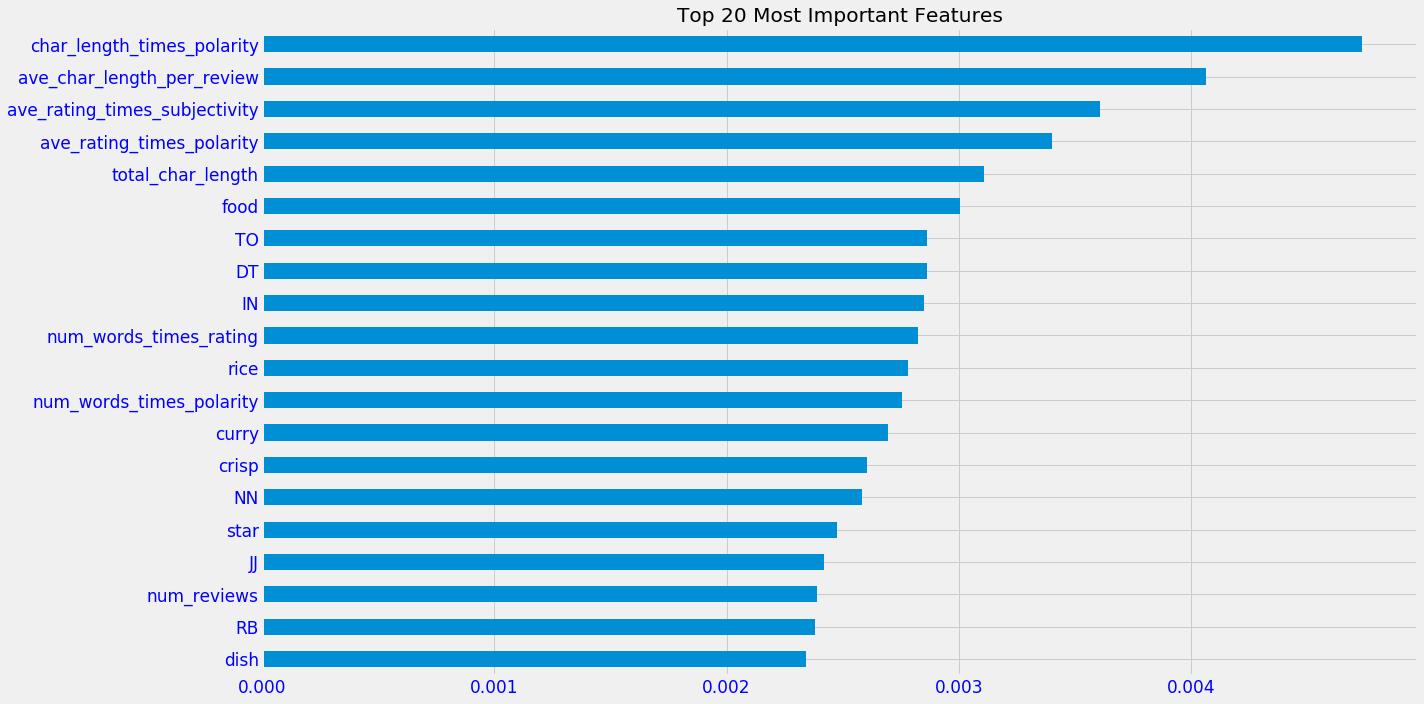

In [113]:
plot_top_importance(model_50_rf)

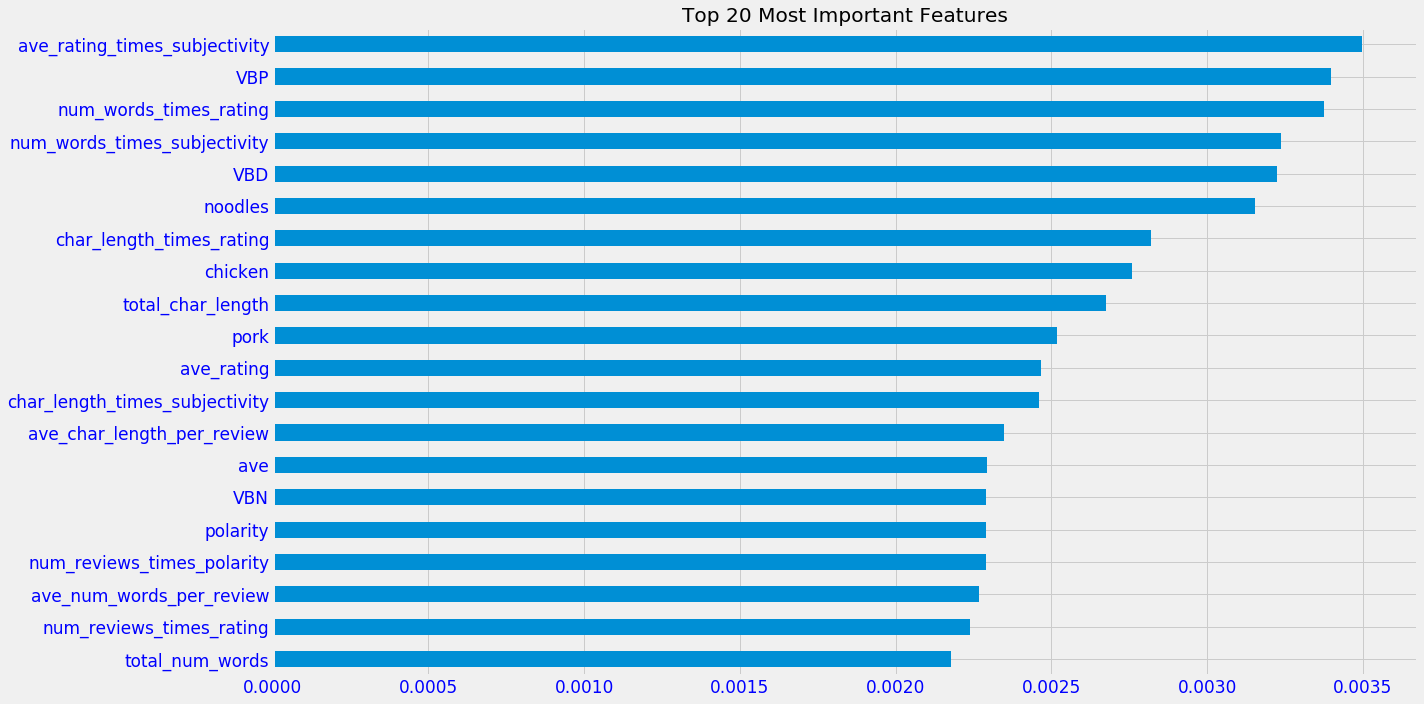

In [114]:
plot_top_importance(model_100_rf)

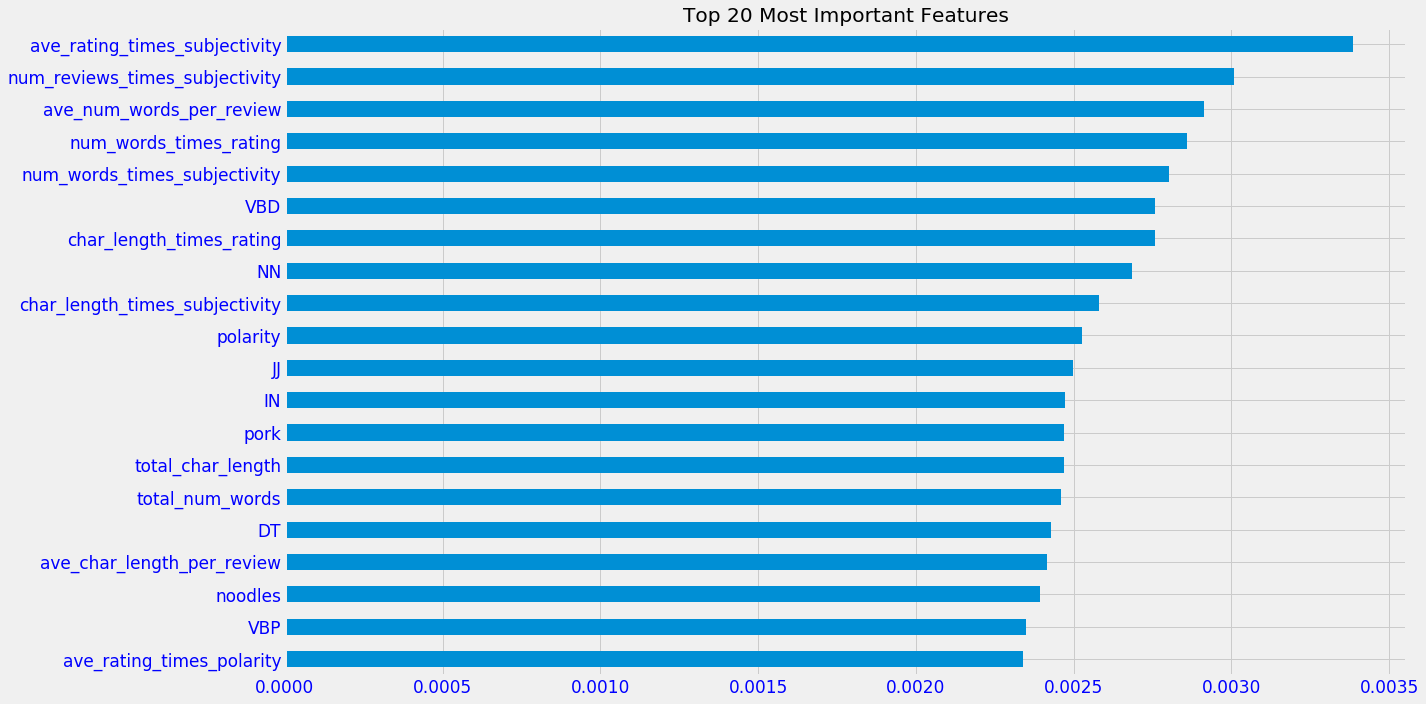

In [115]:
plot_top_importance(model_500_rf)

In [116]:
#plot_top_importance(model_50_3_gb)

In [117]:
#plot_top_importance(model_50_6_gb)

In [118]:
#plot_top_importance(model_100_3_gb)

In [119]:
#plot_top_importance(model_100_6_gb)

In [120]:
#plot_top_importance(model_500_3_gb)

In [121]:
#plot_top_importance(model_500_6_gb)

In [122]:
#plot_top_importance(model_500_9_gb)

In [123]:
#plot_top_importance(model_200_9_gb)

In [124]:
def feature_names_by_importance(model):
    feature_importance = pd.DataFrame({'importance': model.feature_importances_},
                            index = train_raw_data.columns).sort_values('importance', ascending = False).index
    return feature_importance

In [ ]:
def transform_train_test(model):   
    index_permutation = []
    feature_importance = feature_names_by_importance(model)
    for i in feature_importance:
        index_permutation.append(feature_table_index.get_loc(i))
    
    train_trans_data_ordered = train_trans_data[:,index_permutation]
    test_trans_data_ordered = test_trans_data[:,index_permutation]
   
    return train_trans_data_ordered, test_trans_data_ordered

In [ ]:
train_50_rf, test_50_rf = transform_train_test(model_50_rf)
train_100_rf, test_100_rf = transform_train_test(model_100_rf)
train_200_rf, test_200_rf = transform_train_test(model_200_rf)
train_500_rf, test_500_rf = transform_train_test(model_500_rf)

In [ ]:
#train_50_3_gb, test_50_3_gb = transform_train_test(model_50_3_gb)
#train_100_3_gb, test_100_3_gb = transform_train_test(model_100_3_gb)
#train_200_3_gb, test_200_3_gb = transform_train_test(model_200_3_gb)
#train_500_3_gb, test_500_3_gb = transform_train_test(model_500_3_gb)

In [ ]:
#train_50_6_gb, test_50_6_gb= transform_train_test(model_50_6_gb)
#train_100_6_gb, test_100_6_gb = transform_train_test(model_100_6_gb)
#train_200_6_gb, test_200_6_gb = transform_train_test(model_200_6_gb)
#train_500_6_gb, test_500_6_gb = transform_train_test(model_500_6_gb)

In [ ]:
#train_50_9_gb, test_50_9_gb = transform_train_test(model_50_9_gb)
#train_100_9_gb, test_100_9_gb = transform_train_test(model_100_9_gb)
#train_200_9_gb, test_200_9_gb = transform_train_test(model_200_9_gb)
#train_500_9_gb, test_500_9_gb = transform_train_test(model_500_9_gb)

In [ ]:
#len(test_50_rf)

In [ ]:
train_label = np.empty([546,])
for i in range(len(train_label)):
    train_label[i] = int(train_labels_array[i])
train_label

In [ ]:
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

In [ ]:
def feature_selection(model, train_data, number_of_features, number_of_folds):
    i = 3
    current_number_var = []
    current_mean = []
    current_std = []
    while i < number_of_features:
        cv_f1_score = cross_validation.cross_val_score(model,
                                                      train_data[:,0:i],
                                                      train_label,
                                                      scoring = 'f1_weighted',
                                                      cv = number_of_folds)
        current_number_var.append(i)
        current_mean.append(np.mean(cv_f1_score))
        current_std.append(np.std(cv_f1_score))
        
        i += 3
        
    feature_table = pd.DataFrame({'num_vars':current_number_var, 'mean':current_mean, 'std':current_std})
    feature_table = feature_table.sort_values('mean', ascending = False)
   # top_num_features = int(feature_table.iloc[0][1])
   # print "Top # of features", top_num_features
    return feature_table

In [ ]:
def top_num_of_features(feature_table):
    top_num_features = int(feature_table.iloc[0][1])
    print "Top number of features", top_num_features    

In [ ]:
feature_table_model_50_rf = feature_selection(model_50_rf, train_50_rf, 400, 5)
feature_table_model_100_rf = feature_selection(model_100_rf, train_100_rf, 400, 5)
feature_table_model_200_rf = feature_selection(model_200_rf, train_200_rf, 400, 5)
feature_table_model_500_rf = feature_selection(model_500_rf, train_500_rf, 400, 5)

In [ ]:
#feature_table_model_50_3_gb = feature_selection(model_50_3_gb, train_50_3_gb, 400, 5)
#feature_table_model_100_3_gb = feature_selection(model_100_3_gb,train_100_3_gb, 400, 5)
#feature_table_model_200_3_gb = feature_selection(model_200_3_gb, train_200_3_gb, 400, 5)
#feature_table_model_500_3_gb = feature_selection(model_500_3_gb, train_500_3_gb,  400, 5)

In [ ]:
#feature_table_model_50_6_gb = feature_selection(model_50_6_gb,train_50_6_gb, 400, 5)
#feature_table_model_100_6_gb = feature_selection(model_100_6_gb, train_100_6_gb, 400, 5)
#feature_table_model_200_6_gb = feature_selection(model_200_6_gb, train_200_6_gb, 400, 5)
#feature_table_model_500_6_gb = feature_selection(model_500_6_gb, train_500_6_gb, 400, 5)

In [ ]:
#feature_table_model_50_9_gb = feature_selection(model_50_9_gb, train_50_9_gb, 400, 5)
#feature_table_model_100_9_gb = feature_selection(model_100_9_gb, train_100_9_gb, 400, 5)
#feature_table_model_200_9_gb = feature_selection(model_200_9_gb, train_200_9_gb, 400, 5)
#feature_table_model_500_9_gb = feature_selection(model_500_9_gb,train_500_9_gb,  400, 5)

In [ ]:
def top_mean_f1_score(feature_table):
    top_f1_score = float(feature_table.iloc[0][0])
    print "Top mean f1 score", top_f1_score    

In [ ]:
def f1_score_number_of_features(feature_table):
    top_num_features = int(feature_table.iloc[0][1])
    top_f1_score = float(feature_table.iloc[0][0])
    print "Top number of features: ", top_num_features
    print "Top mean f1 score", top_f1_score

In [ ]:
f1_score_number_of_features(feature_table_model_50_rf)
f1_score_number_of_features(feature_table_model_100_rf)
f1_score_number_of_features(feature_table_model_200_rf)
f1_score_number_of_features(feature_table_model_500_rf)

In [ ]:
#f1_score_number_of_features(feature_table_model_50_3_gb)
#f1_score_number_of_features(feature_table_model_100_3_gb)
#f1_score_number_of_features(feature_table_model_200_3_gb) 
#f1_score_number_of_features(feature_table_model_500_3_gb) 

In [ ]:
#f1_score_number_of_features(feature_table_model_50_6_gb) 
#f1_score_number_of_features(feature_table_model_100_6_gb) 
#f1_score_number_of_features(feature_table_model_200_6_gb) 
#f1_score_number_of_features(feature_table_model_500_6_gb)

In [ ]:
#f1_score_number_of_features(feature_table_model_50_9_gb)
#f1_score_number_of_features(feature_table_model_100_9_gb)
#f1_score_number_of_features(feature_table_model_200_9_gb) 
#f1_score_number_of_features(feature_table_model_500_9_gb) 

In [ ]:
def num_of_features_plot(feature_table):
    feature_table_dropstd = feature_table.drop('std', axis = 1).set_index('num_vars').sort_index()
    plt.style.use('fivethirtyeight')
    feature_table_dropstd.plot(fontsize = 17, figsize = (20, 5), legend = False)
    plt.title("F1 Score by Number of Most Important Features",
             loc = 'left', y = 1.1, fontsize = 30, fontweight = 'bold', color = 'orange')
    
    plt.tight_layout()  

In [ ]:
#num_of_features_plot(feature_table_best)